In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
data = pd.read_csv("C:/Users/santi/Downloads/Visual Studio Code/Python Psychology/Ejercicio de medidas repetidas - datos.csv")
data.dtypes

ID             int64
Puntuación     int64
Tarea         object
Demora        object
dtype: object

In [3]:
# Realiza el análisis de medidas repetidas (ANOVA)
# Realiza el análisis de medidas repetidas (ANOVA)
model = ols('Puntuación ~ C(Tarea) * C(Demora) + C(ID)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)



                        sum_sq     df          F        PR(>F)
C(Tarea)            156.044444    2.0  43.525377  1.039301e-15
C(Demora)           363.777778    3.0  67.645536  5.846152e-28
C(ID)               239.411111   14.0   9.539827  5.437999e-15
C(Tarea):C(Demora)   44.622222    6.0   4.148816  6.818035e-04
Residual            276.055556  154.0        NaN           NaN


In [4]:
# Realiza el análisis post-hoc
posthoc = pairwise_tukeyhsd(
    endog=data['Puntuación'],     # Columna de datos
    groups=data['Tarea'],   # Columna de grupos
    alpha=0.05)                    # Nivel de significancia

# Imprime la tabla de resultados
print(posthoc)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
   Reconocimiento Recuerdo asistido     -1.7 0.0002 -2.6859 -0.7141   True
   Reconocimiento    Recuerdo libre  -2.1667    0.0 -3.1526 -1.1808   True
Recuerdo asistido    Recuerdo libre  -0.4667 0.5038 -1.4526  0.5192  False
--------------------------------------------------------------------------


In [5]:
from scipy.stats import bartlett

# Obtén los datos para cada grupo
grupo1 = data[data['Tarea'] == 'Reconocimiento']['Puntuación']
grupo2 = data[data['Tarea'] == 'Recuerdo asistido']['Puntuación']
grupo3 = data[data['Tarea'] == 'Recuerdo libre']['Puntuación']

# Realiza la prueba de Bartlett
stat, p = bartlett(grupo1, grupo2, grupo3)

print('Estadística:', stat)
print('p-valor:', p)


Estadística: 2.2066382826136013
p-valor: 0.33176806907766354


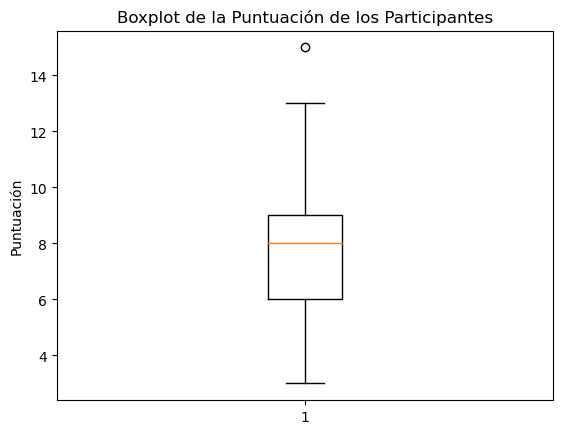

In [6]:
import matplotlib.pyplot as plt

# Crea un boxplot de la puntuación
plt.boxplot(data['Puntuación'])

# Establece el título y las etiquetas de los ejes
plt.title('Boxplot de la Puntuación de los Participantes')
plt.ylabel('Puntuación')


# Muestra el gráfico
plt.show()


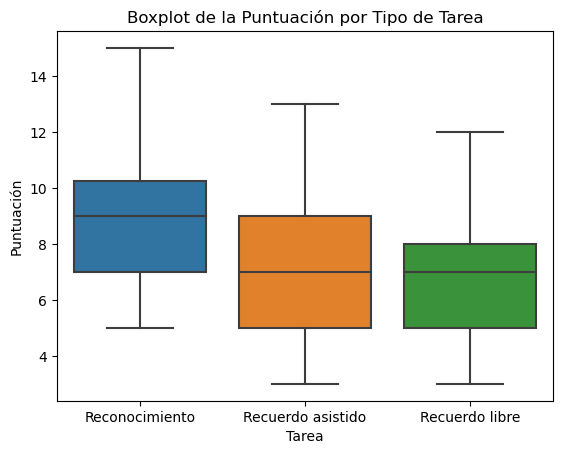

In [7]:
import seaborn as sns

# Crea un boxplot para cada tipo de tarea
sns.boxplot(x='Tarea', y='Puntuación', data=data)

# Establece el título
plt.title('Boxplot de la Puntuación por Tipo de Tarea')

# Muestra el gráfico
plt.show()


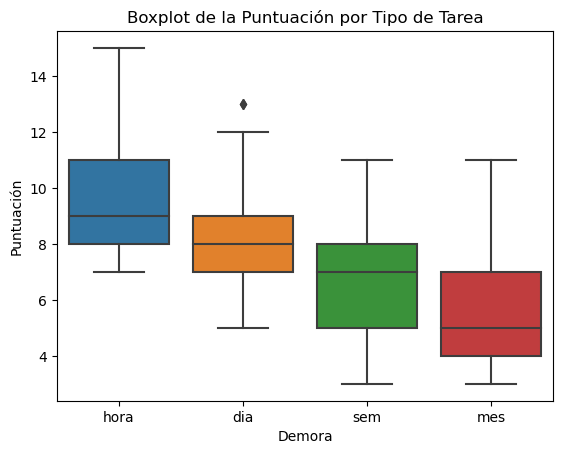

In [8]:
sns.boxplot(x='Demora', y='Puntuación', data=data)

# Establece el título
plt.title('Boxplot de la Puntuación por Tipo de Tarea')

# Muestra el gráfico
plt.show()